In [1]:
from ovarian_can.infrastructure.path_facade.preprocess_path_resolver import PreprocessPathResolver
from ovarian_can.preprocess.abstract_path_resolver import AbstractPreprocessPathResolver
import joblib
# DI: 抽象インターフェースを経由してパス取得
resolver: AbstractPreprocessPathResolver = PreprocessPathResolver()
# input/outputパス取得
intermediate_joblib_path = resolver.get_intermediate_joblib_path()
interm_after_PCA_path = resolver.get_intermediate_after_PCA_path()

In [2]:
# 前処理前のデータを読み込み
adata = joblib.load(intermediate_joblib_path)
adata

View of AnnData object with n_obs × n_vars = 228641 × 480
    obs: 'x_centroid', 'y_centroid', 'transcript_counts', 'control_probe_counts', 'control_codeword_counts', 'unassigned_codeword_counts', 'deprecated_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area'
    var: 'gene_ids', 'feature_types', 'genome'

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
/Users/masaki/ovarian_can/.venv/lib/python3.12/site-packages/scanpy/preprocessing/_pca.py:325: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm["X_pca"] = X_pca


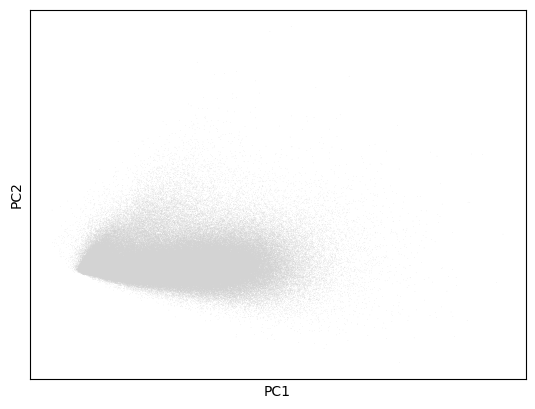

In [3]:
import scanpy as sc 
# PCAを実施（遺伝子発現パターンの差を捉える）
sc.tl.pca(adata, svd_solver='arpack')

# PCAの結果をプロットして確認
sc.pl.pca(adata)

In [4]:
joblib.dump(adata, interm_after_PCA_path)

['/Users/masaki/ovarian_can/data/interim/intermediate_after_PCA.joblib']